In [1]:
import cv2, sys, torch
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.insert(0, 'data_processing/')
from imm_dataset import *
sys.path.pop(0)

from utils.utils import *

from model.model_part1 import *

%load_ext autoreload
%autoreload 2

# sys.path.insert(0, 'utils/')
# print(sys.path)
# from utils import collect_nose_keypoints
# sys.path.pop(0)

In [48]:
len(collect_facial_keypoints('data/imm_face_db/')['01-1m'])

116

In [7]:
calc_dataset_mean_std(resize_shape=(120, 160))

100%|██████████| 240/240 [00:04<00:00, 53.75it/s]


(array([0.24462888]), array([0.13931754]))

In [5]:
calc_trainset_mean_std() 

100%|██████████| 240/240 [00:06<00:00, 34.96it/s]


(array([0.24463636]), array([0.13665744]))

In [4]:
train_dataset = IMMDataset()
im, lbl = train_dataset.__getitem__(56)

im[0].std()

tensor(0.7001)

In [10]:
def show_labeled_im(im, lbls, colors):
	plt.imshow(im, cmap='gray')
	for lbl, color in zip(lbls, colors):
		plt.scatter(lbl[:,0] * im.shape[1], lbl[:,1] * im.shape[0], s=10, c=color)
	plt.show()

# show_labeled_im(im, lbl)

# collect_nose_keypoints('data/imm_face_db/')

In [ ]:
model = IMMClassifier(layers=[1,1,1,1],
											image_channels=1,
											num_epochs=200,
											optimizer = 'Adam',
											lr = 0.001,
											momentum = 0.9,
											scheduler = None,
											save_path = 'pickled_files/best_imm_model.pt',
											nose_keypoint_flag=False
											)
model.load_state_dict(torch.load('pickled_files/best_imm_model.pt'))
model.eval()

In [3]:
def unnormalize_im(im):
	unnormalized_im = im * 0.13665744 + 0.24463636
	return unnormalized_im

In [8]:
val_dataset = FacialDataset(train_flag=False)
im, lbl = val_dataset.__getitem__(5)
print(lbl)
lbl.reshape((-1,2))[:,0]

[0.26993448 0.56150544 0.28505543 0.6676525  0.32537803 0.7509578
 0.3747732  0.8100777  0.41912803 0.8450122  0.44231352 0.8691976
 0.47255543 0.8705412  0.5138861  0.85038674 0.54311997 0.81276494
 0.5693296  0.7549887  0.5854587  0.69989973 0.5915071  0.6407798
 0.5985635  0.5709109  0.5773941  0.47551286 0.5693296  0.4499838
 0.5532006  0.441922   0.53203124 0.45132744 0.5159022  0.46879467
 0.5290071  0.48223102 0.5471522  0.48626193 0.56630546 0.48626193
 0.37275705 0.47685647 0.39191028 0.45535833 0.41307965 0.44326562
 0.43424898 0.45132744 0.4513861  0.47551286 0.43223286 0.48088738
 0.4140877  0.48894918 0.3939264  0.48626193 0.51791835 0.42311114
 0.54311997 0.39758208 0.57134575 0.39355117 0.590499   0.40430024
 0.59755546 0.43117294 0.47154737 0.42714202 0.43828124 0.3895203
 0.39594254 0.39220753 0.36368448 0.40161297 0.34150705 0.43654746
 0.42316028 0.68646336 0.48364416 0.647498   0.50078124 0.66227794
 0.51691025 0.64615434 0.5511845  0.68108886 0.5219506  0.7146797
 

array([0.26993448, 0.28505543, 0.32537803, 0.3747732 , 0.41912803,
       0.44231352, 0.47255543, 0.5138861 , 0.54311997, 0.5693296 ,
       0.5854587 , 0.5915071 , 0.5985635 , 0.5773941 , 0.5693296 ,
       0.5532006 , 0.53203124, 0.5159022 , 0.5290071 , 0.5471522 ,
       0.56630546, 0.37275705, 0.39191028, 0.41307965, 0.43424898,
       0.4513861 , 0.43223286, 0.4140877 , 0.3939264 , 0.51791835,
       0.54311997, 0.57134575, 0.590499  , 0.59755546, 0.47154737,
       0.43828124, 0.39594254, 0.36368448, 0.34150705, 0.42316028,
       0.48364416, 0.50078124, 0.51691025, 0.5511845 , 0.5219506 ,
       0.49271673, 0.46650705, 0.4705393 , 0.46953124, 0.4624748 ,
       0.47154737, 0.48566028, 0.50884575, 0.52699095, 0.5380796 ,
       0.54009575, 0.5290071 , 0.51791835], dtype=float32)

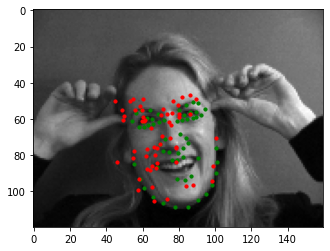

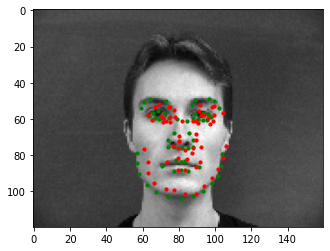

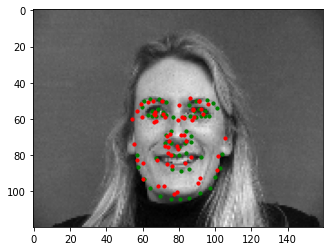

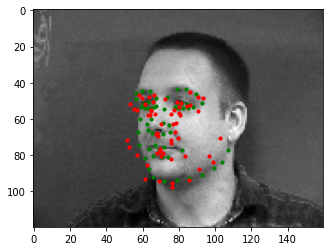

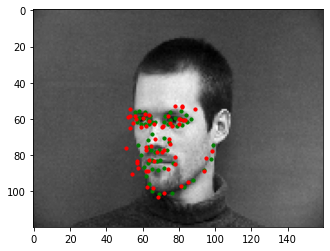

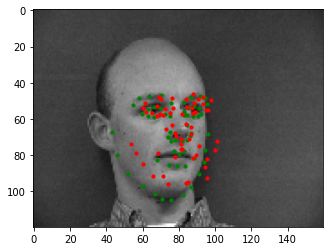

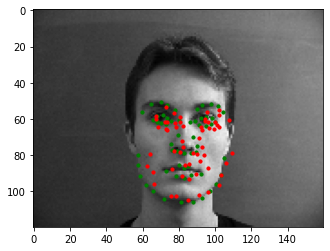

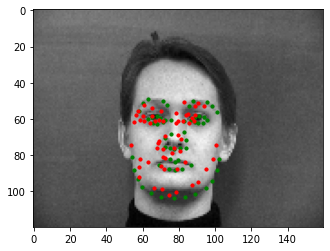

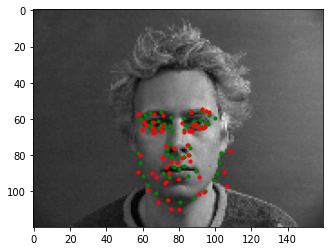

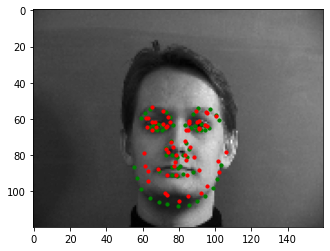

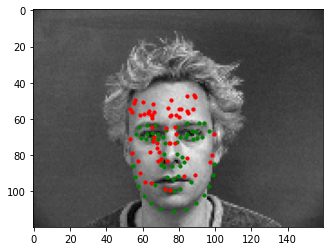

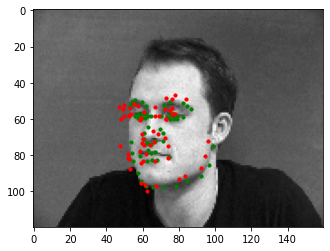

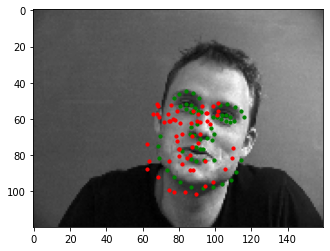

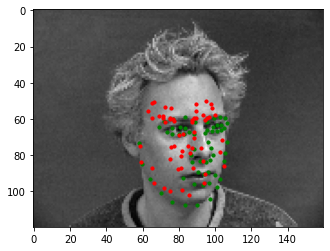

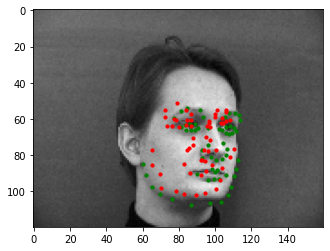

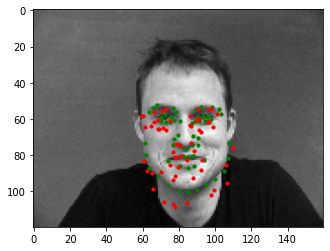

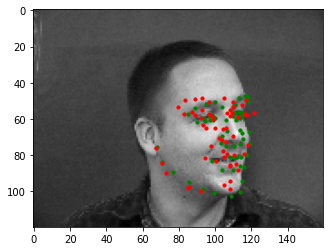

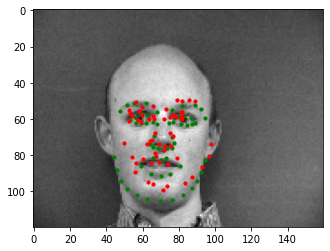

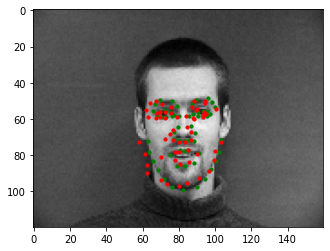

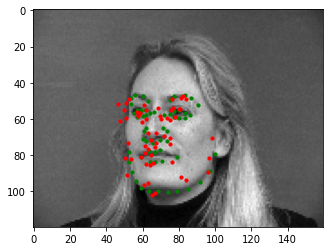

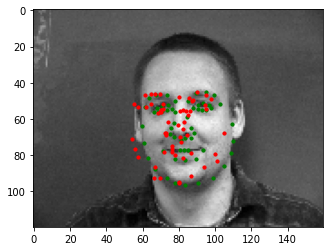

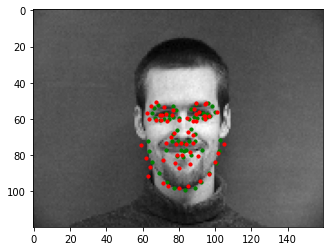

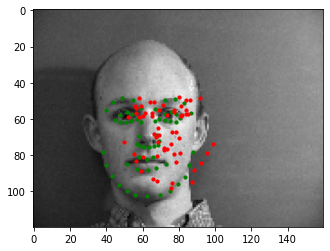

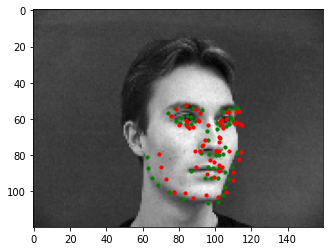

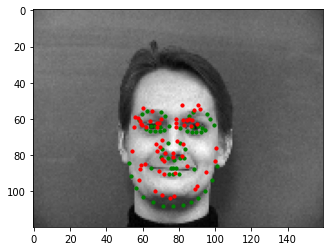

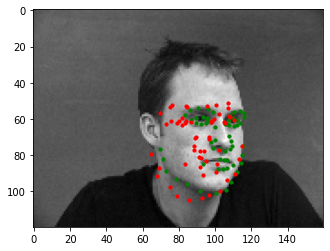

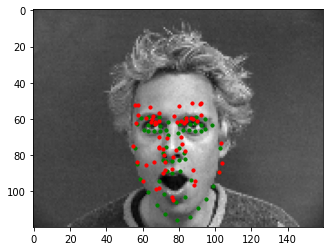

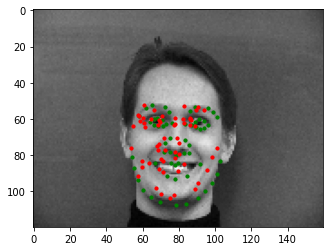

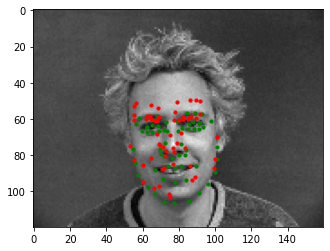

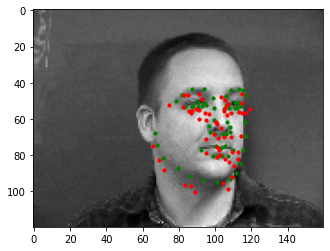

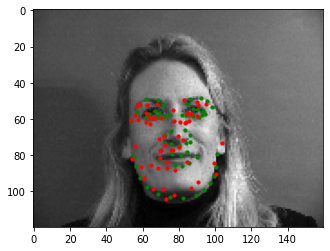

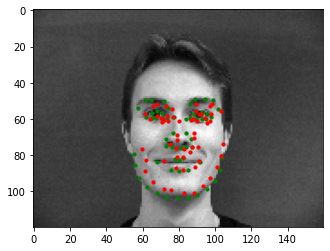

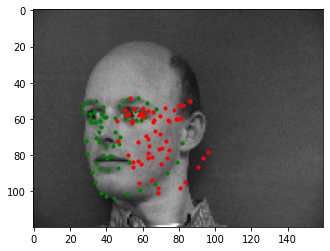

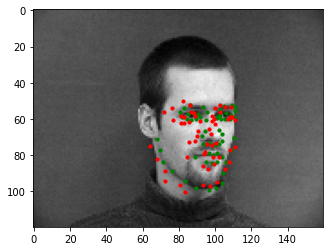

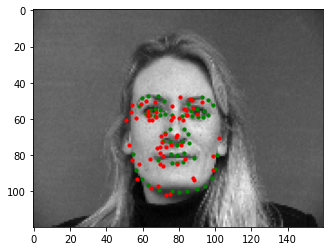

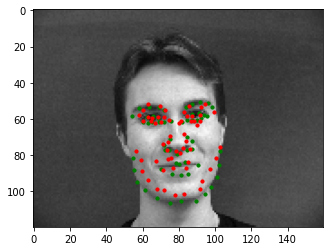

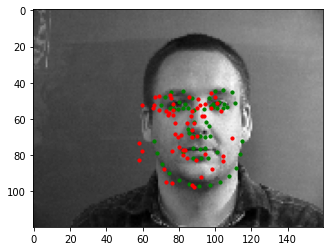

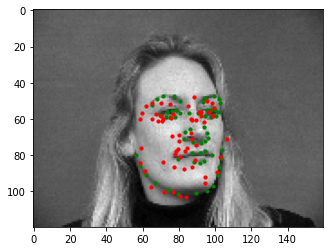

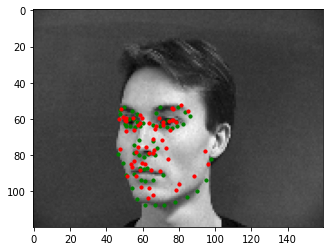

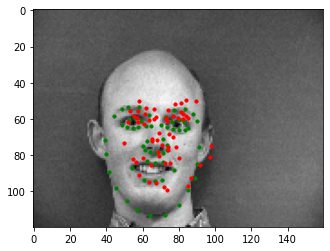

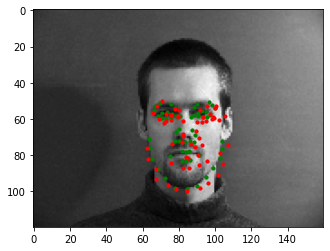

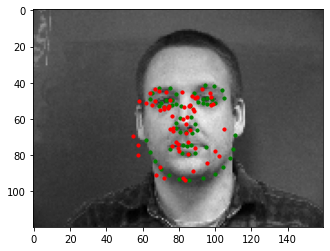

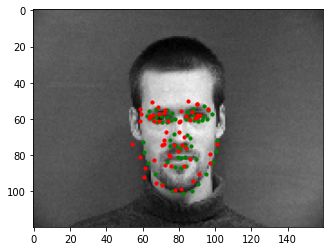

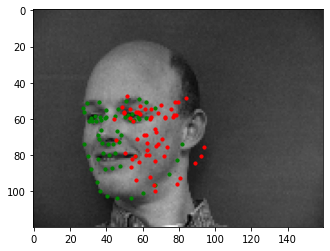

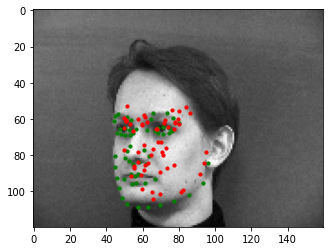

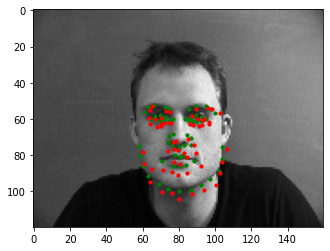

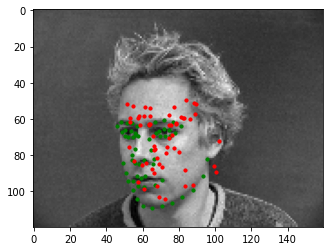

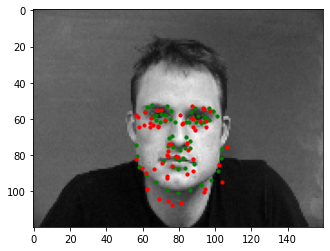

In [15]:
val_dataset = FacialDataset(train_flag=False)

for i in range(len(val_dataset)):
	im, lbl = val_dataset.__getitem__(i)
	unnormalized_im = unnormalize_im(im)
	pred = model(torch.unsqueeze(im, 0)).detach().numpy().reshape((-1,2))
	lbl = lbl.reshape((-1,2))
	show_labeled_im(unnormalized_im[0], [lbl, pred], ['green', 'red'])

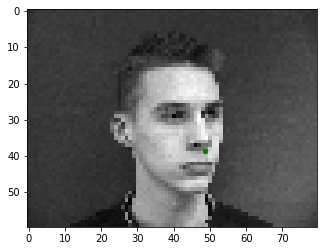

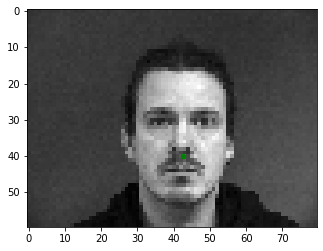

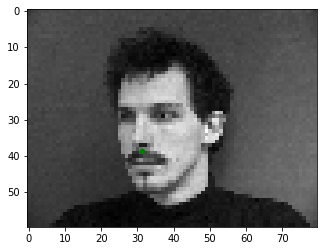

In [32]:
train_dataset = IMMDataset(train_flag=True)

for i in range(3):
	im, lbl = train_dataset.__getitem__(i)
	unnormalized_im = unnormalize_im(im)
	show_labeled_im(unnormalized_im[0], [lbl], ['green'])

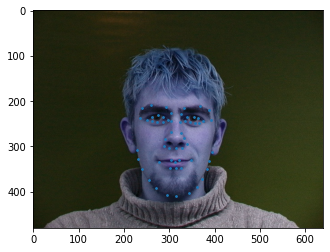

In [12]:
im_path = 'data/imm_face_db/01-1m.jpg'
landmarks = [[0.35763609, 0.64077979], [0.36267641, 0.68243247], [0.3747732, 0.72945964], [0.39896673, 0.78051776], [0.42215222, 0.81679589], [0.4594506, 0.84769946], [0.4907006, 0.85441762], [0.53707159, 0.83963764], [0.56428933, 0.81007773], [0.58243448, 0.77245593], [0.59755546, 0.72811604], [0.60763609, 0.6904943], [0.61469257, 0.65018529], [0.5844506, 0.50776005], [0.56932962, 0.49298009], [0.5532006, 0.48760554], [0.5310232, 0.49029282], [0.5229587, 0.50641644], [0.54110384, 0.51179093], [0.55622482, 0.51582187], [0.57235384, 0.51582187], [0.39291835, 0.50507277], [0.41106352, 0.48894918], [0.43021673, 0.48088738], [0.4483619, 0.49163646], [0.46449092, 0.50507277], [0.44634578, 0.51044732], [0.4282006, 0.51179093], [0.41005543, 0.50910372], [0.50783771, 0.47551286], [0.52094257, 0.44864017], [0.57336187, 0.4378911], [0.60561997, 0.45670196], [0.61166835, 0.50238556], [0.47658771, 0.47282559], [0.45743448, 0.44460928], [0.40501511, 0.43386021], [0.37578124, 0.44864017], [0.36973286, 0.49298009], [0.43424898, 0.69452518], [0.47658771, 0.68646336], [0.48969254, 0.69452518], [0.50279737, 0.68511975], [0.54513609, 0.68646336], [0.50884575, 0.72408509], [0.4907006, 0.72542876], [0.47255543, 0.72408509], [0.47457156, 0.50910372], [0.47557965, 0.56016177], [0.45340222, 0.59240901], [0.45138609, 0.6246562], [0.4685232, 0.63271803], [0.4907006, 0.63137436], [0.51388609, 0.63271803], [0.52900708, 0.61525077], [0.52094257, 0.58569086], [0.50884575, 0.56150544], [0.50682962, 0.51179093]]
im = cv2.imread(im_path)
landmark_pts = np.array([[x[0] * im.shape[1], x[1] * im.shape[0]] for x in landmarks])
plt.imshow(im)
plt.scatter(landmark_pts[:,0], landmark_pts[:,1], s=3)
plt.show()